In [2]:
# install necessary packages
import numpy as np
import matplotlib.pyplot as plt

#install sklearn modules
from sklearn import datasets,svm, metrics, linear_model
from sklearn.model_selection import train_test_split

In [3]:
#Let's load the data and look at how it is structured:
digits = datasets.load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [4]:
#You can see here digits is a type of dictionary where the value of the dicionary elements are numpy arrays.
digits


{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [8]:
import collections
print(digits.keys())
print(type(digits['data']))
print(len(digits['data']))
print(type(digits['target']))
print(digits['DESCR'])
print("\n\n")
print(collections.Counter(digits['target']))
print("\n\n")

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
<class 'numpy.ndarray'>
1797
<class 'numpy.ndarray'>
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the tes

[ 0.  6. 13.  5.  8.  8.  1.  0.  0.  8. 16. 16. 16. 16.  6.  0.  0.  6.
 16.  9.  6.  4.  0.  0.  0.  6. 16. 16. 15.  5.  0.  0.  0.  0.  4.  5.
 15. 12.  0.  0.  0.  0.  0.  3. 16.  9.  0.  0.  0.  1.  8. 13. 15.  3.
  0.  0.  0.  4. 16. 15.  3.  0.  0.  0.]
(64,)
[[ 0.  6. 13.  5.  8.  8.  1.  0.]
 [ 0.  8. 16. 16. 16. 16.  6.  0.]
 [ 0.  6. 16.  9.  6.  4.  0.  0.]
 [ 0.  6. 16. 16. 15.  5.  0.  0.]
 [ 0.  0.  4.  5. 15. 12.  0.  0.]
 [ 0.  0.  0.  3. 16.  9.  0.  0.]
 [ 0.  1.  8. 13. 15.  3.  0.  0.]
 [ 0.  4. 16. 15.  3.  0.  0.  0.]]
(8, 8)
5


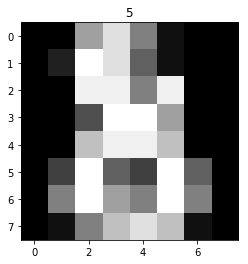

In [12]:
#Let's take a look at some images and their labels:
#plt.figure()
some_digit = digits.data[33]
some_image = digits.images[33]
some_label = digits.target[33]
print(some_digit)
print(some_digit.shape)
print(some_image)
print(some_image.shape)
print(some_label)
#some_digit_image = digits.image[33].reshape(8,8)

plt.title(some_label)
plt.imshow(digits.images[-1], cmap=plt.cm.gray)
#plt.axis("off")
#plt.show()




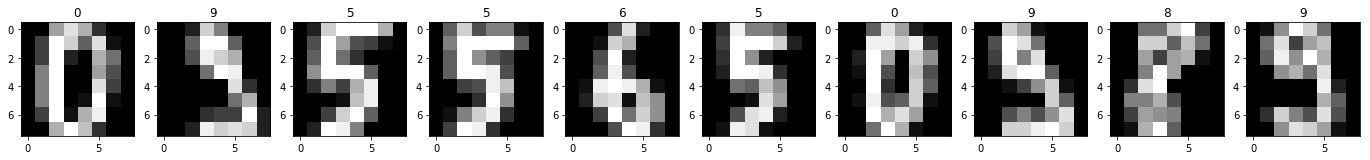

In [14]:

plt.figure(figsize = (24,24))
for element, (image, label) in enumerate(zip(digits.data[30:40],digits.target[30:40])):
    plt.subplot(1,10,element +1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('%i' % label)



In [25]:
#Let's use train_test_split to split our data
d_train, d_test, l_train, l_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=0)
print(l_train.shape)
print(l_train[:5])


(1437,)
[6 5 3 4 4]


In [26]:
l_train_5 = (l_train == 5)
l_test_5 = (l_test == 5)
print(l_train_5[:5])


[False  True False False False]


In [27]:
#import your model 
#Let's try logistic regression first
from sklearn.linear_model import LogisticRegression

lr_class = LogisticRegression()
print(type(lr_class))
lr_class.get_params()

<class 'sklearn.linear_model._logistic.LogisticRegression'>


{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
#We run a fit on our training data to train the model
lr_class.set_params(solver='lbfgs',max_iter=300)
lr_class.fit(d_train, l_train_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
#Now we predict on the trained model

print(lr_class.predict([some_digit]))



[ True]


In [30]:
#predicted class
lr_class.predict(d_train[0:10])

array([False,  True, False, False, False, False, False, False, False,
       False])

In [31]:
#true class
l_train_5[0:10]


array([False,  True, False, False, False, False, False, False, False,
       False])

In [32]:
from sklearn.metrics import accuracy_score
digit_predictions = lr_class.predict(d_train)
digit_accuracy = accuracy_score(l_train_5,digit_predictions)
print(digit_accuracy)

1.0


In [35]:
from sklearn.metrics import precision_score
digit_precision = precision_score(l_train_5,digit_predictions)
print(digit_precision)

1.0


In [36]:
from sklearn.metrics import recall_score
digit_recall = recall_score(l_train_5, digit_predictions)
print(digit_recall)

1.0


In [37]:
from sklearn.metrics import f1_score
digit_f1 = f1_score(l_train_5, digit_predictions)
print(digit_f1)

1.0


In [38]:
from sklearn.metrics import classification_report
print(classification_report(l_train_5,digit_predictions))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1295
        True       1.00      1.00      1.00       142

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [39]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr_class,d_train,l_train_5, cv=3, scoring="accuracy")

array([0.98956159, 0.9874739 , 0.99791232])

In [40]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [41]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf,d_train,l_train_5, cv=3, scoring="accuracy")

array([0.86847599, 0.91022965, 0.92484342])

In [42]:
#accuracy is the ratio of correct predictions (both true and false)

#accuracy is not a good performance measure - especially if your data is skewed

#Let's look at a confusion matrix instead

In [43]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(lr_class, d_train, l_train_5, cv=3)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(l_train_5, y_train_pred)

array([[1291,    4],
       [   8,  134]])

In [45]:
d_scores = lr_class.decision_function([some_digit])
print(d_scores)
threshold = 0 
y_some_digit_pred = (d_scores > threshold)
print(y_some_digit_pred)

[13.65105929]
[ True]


In [46]:
threshold = 20
y_some_digit_pred = (d_scores > threshold)
print(y_some_digit_pred)

[False]


In [48]:
y_scores = cross_val_predict(lr_class, d_train, l_train_5, cv=3, method="decision_function")

<class 'numpy.ndarray'>
[0.42011834 0.41839763 0.41964286 0.42089552 0.42215569]


Text(0.5,0,'Threshold')

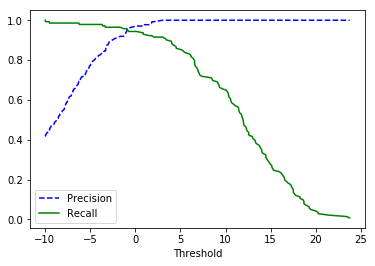

In [52]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(l_train_5, y_scores)
print(type(precisions))
print(precisions[:5])
plt.plot(thresholds, precisions[:-1], "b--",label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend()
plt.xlabel("Threshold")

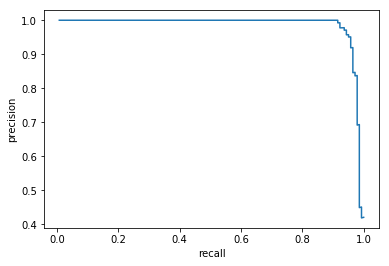

In [53]:

plt.plot(recalls[:-1],precisions[:-1])
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [ ]:
#Let's try a different classifier:
svm_class = svm.SVC(gamma=0.001)
svm_class.fit(d_train, l_train)

In [ ]:
svm_class.predict(d_test[0].reshape(1,-1))

In [ ]:
svm_class.predict(d_test[0:10])

In [62]:
#what is the threshold value that reaches 90% precision?
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
print(threshold_90_precision)
print(y_scores[:5])
#now look for scores higher than that
y_train_pred_90 = (y_scores >= threshold_90_precision)
print(type(y_train_pred_90))
print(y_train_pred_90.dtype)
print(y_train_pred_90[:5])

-2.5157767701023896
[-20.29182243   4.55489446  -9.61036663 -18.41095695 -22.0786528 ]
<class 'numpy.ndarray'>
bool
[False  True False False False]


In [63]:
precision_score(l_train_5, y_train_pred_90)

0.9013157894736842

In [65]:
recall_score(l_train_5, y_train_pred_90)

0.9647887323943662

In [66]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(l_train_5, y_scores)

Text(0,0.5,'True Positive Rate')

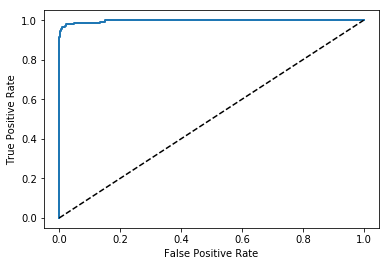

In [70]:
plt.plot(fpr,tpr,linewidth=2,label=label)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(l_train_5, y_scores)

0.9971830985915493